# Biostats 521: Lab 1
Brian Kim
2023-09-22
# Background

# Data Description

# Exploratory Analysis

In [1]:
# Import Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import skew
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.diagnostic import lilliefors
from statsmodels.distributions.empirical_distribution import ECDF

data = pd.read_excel("D:\\Data\\Biostat521\\NUTR_521_lab_data.xlsx")

# Organize Data into variables
albumin = data['URXUMS']
HEI = data['HEI2015_TOTAL_SCORE']
gender = data['RIAGENDR']
age = data['RIDAGEYR']
race = data['RIDRETH3']
education = data['DMDEDUC2']
bmi = data['BMXBMI']
systolic = data['BPXSY1']
alc = data['WkAlcDays']
diabetes = data['DIQ010']

## Univariate Analysis

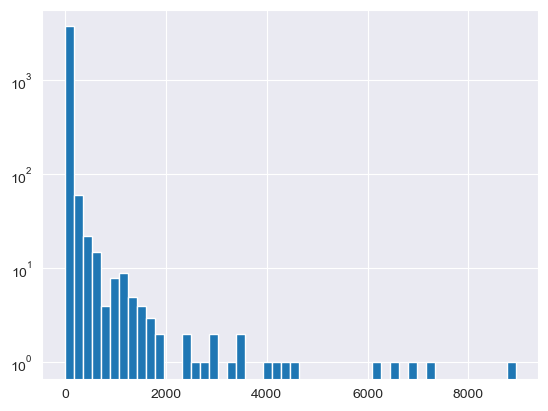

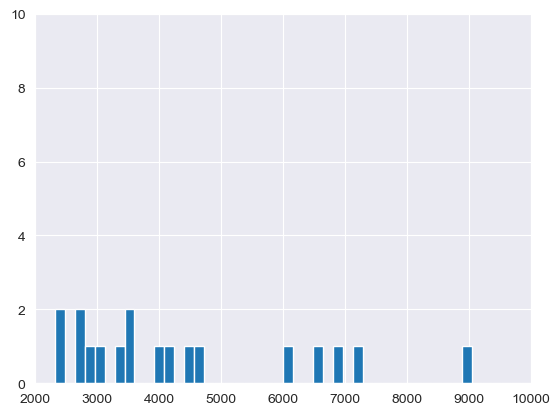

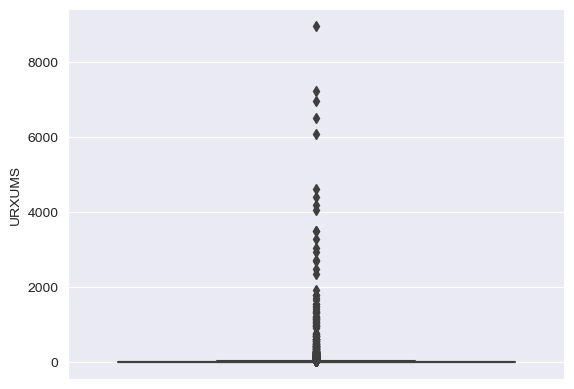

In [2]:
# Histogram with log YScale
plt.figure()
plt.hist(albumin, bins = 50)
plt.yscale('log')
plt.show()

# Histogram for values above 2000
plt.figure()
plt.hist(albumin, bins=50, range=(2000, 10000))
plt.xlim(2000, 10000)
plt.ylim(0, 10)
plt.show()

# Box plot
plt.figure()
sns.boxplot(y=albumin)
plt.show()

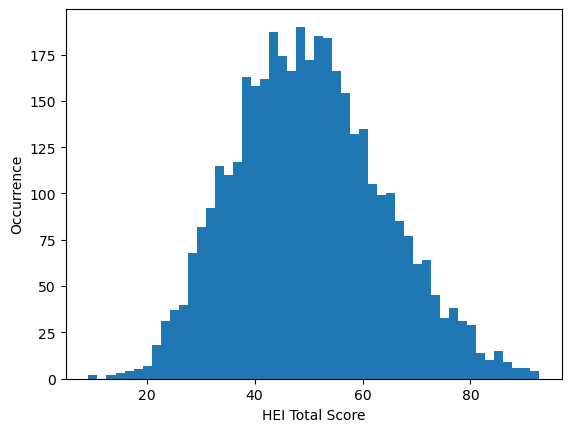

Mean: 50.12736163258079
Median: 49.40076354
Standard Deviation: 13.862063481606608


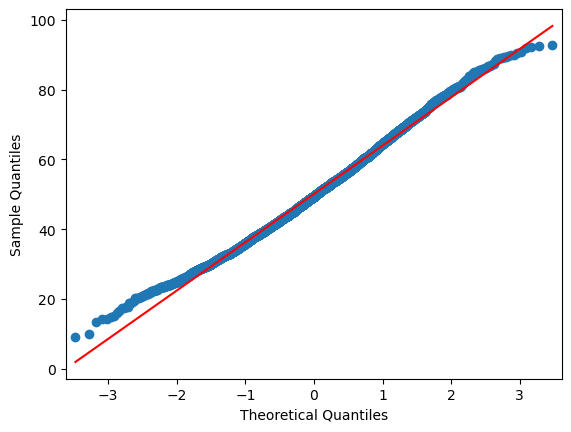

Data does not seem to be normally distributed
Data does not seem to be normally distributed


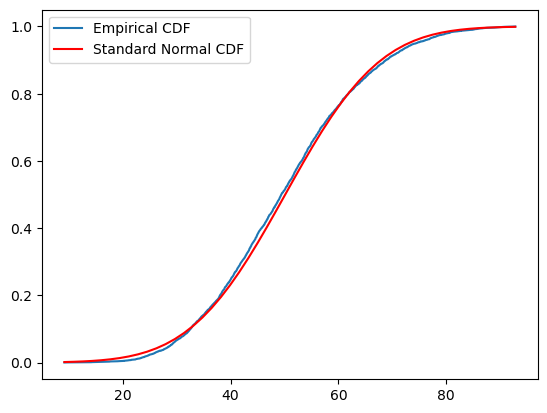

In [17]:
# HEI 2015
# Univariate Data Visualization
plt.figure()
plt.hist(HEI, bins=50)
plt.xlabel('HEI Total Score')
plt.ylabel('Occurrence')
plt.show()

# Basic Statistics
HEI_mean = np.mean(HEI)
HEI_median = np.median(HEI)
HEI_sd = np.std(HEI, ddof=1)  # use ddof=1 to get sample std dev
print(f'Mean: {HEI_mean}\nMedian: {HEI_median}\nStandard Deviation: {HEI_sd}')

# Checks for Normality
qqplot(HEI, line='s')
plt.show()


# Lilliefors Test
hypothesis, pval = lilliefors(HEI)
if hypothesis == 0:
    print('Data seems to be normally distributed')
else:
    print('Data does not seem to be normally distributed')

# Kolmogorov-Smirnov Test
normalized_HEI = (HEI - HEI_mean) / HEI_sd
hypothesis, pval = stats.kstest(normalized_HEI, 'norm')
if hypothesis == 0:
    print('Data seems to be normally distributed')
else:
    print('Data does not seem to be normally distributed')

# Plot Cumulative Distribution Plot
ecdf = ECDF(HEI)
plt.figure()
plt.plot(ecdf.x, ecdf.y, label='Empirical CDF')
x_values = np.linspace(min(HEI), max(HEI))
plt.plot(x_values, stats.norm.cdf(x_values, HEI_mean, HEI_sd), 'r-', label='Standard Normal CDF')
plt.legend(loc='best')
plt.show()

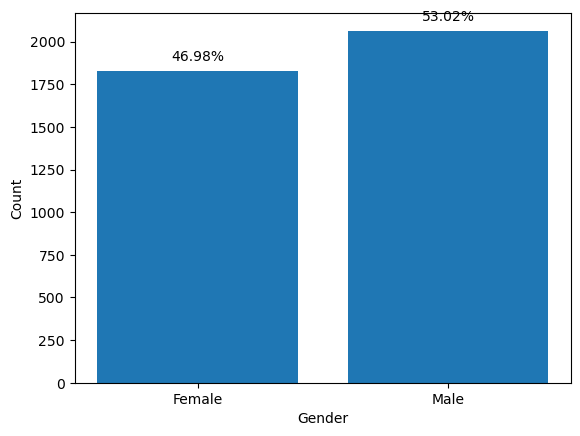

In [18]:
# Gender
# Compute the counts for each unique value in the gender array
unique_genders, counts = np.unique(gender, return_counts=True)

# Calculate the gender percentages
gender_percentages = (counts / np.sum(counts)) * 100

# Plotting
plt.figure()
bars = plt.bar(unique_genders, counts, tick_label=unique_genders)
plt.xlabel('Gender')
plt.ylabel('Count')

# Annotate the bars with the respective percentages
for bar, percentage in zip(bars, gender_percentages):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + max(counts)*0.02,
             f'{percentage:.2f}%', ha='center', va='bottom')

plt.show()

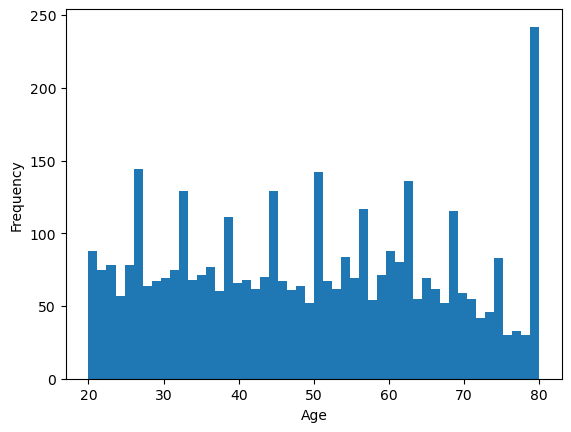

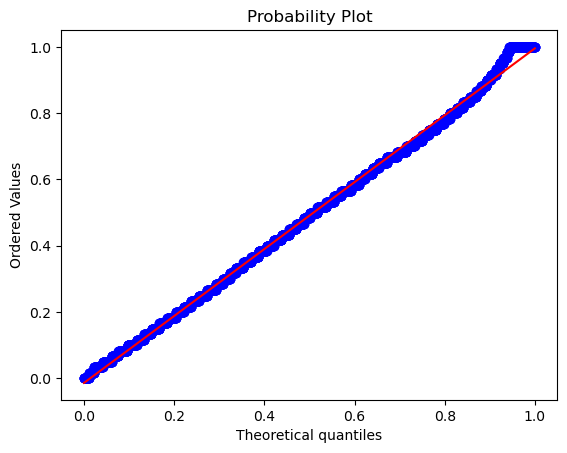

Data does not seem to be uniformly distributed


In [21]:
# Plot histogram for age
plt.figure()
plt.hist(age, bins=50)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# QQ plot for uniformity
plt.figure()
stats.probplot((age - np.min(age)) / (np.max(age) - np.min(age)), dist='uniform', plot=plt)
plt.show()

# Kolmogorov-Smirnov Test for uniformity
normalized_age = (age - np.min(age)) / (np.max(age) - np.min(age))
hypothesis, pval = stats.kstest(normalized_age, 'uniform')
if hypothesis == 0:
    print('Data seems to be uniformly distributed')
else:
    print('Data does not seem to be uniformly distributed')

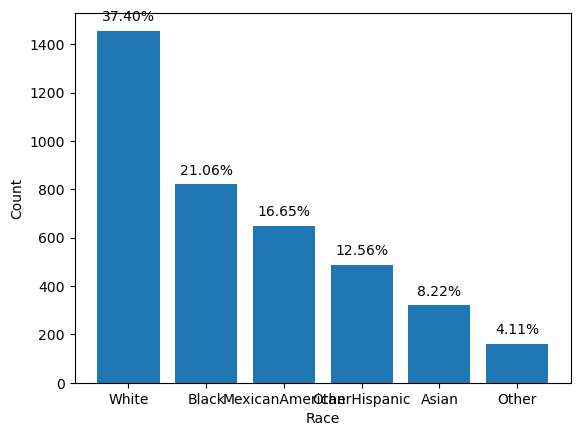

In [22]:
# Compute the counts for each unique value in the race array
unique_races, counts = np.unique(race, return_counts=True)

# Sort the counts and their corresponding race labels in descending order
sorted_idx = np.argsort(counts)[::-1]  # [::-1] to sort in descending order
sorted_counts = counts[sorted_idx]
sorted_races = unique_races[sorted_idx]

# Calculate the race percentages
race_percentages = (sorted_counts / np.sum(sorted_counts)) * 100

# Plotting
plt.figure()
bars = plt.bar(range(len(sorted_races)), sorted_counts, tick_label=sorted_races)
plt.xlabel('Race')
plt.ylabel('Count')

# Annotate the bars with the respective percentages
for bar, percentage in zip(bars, race_percentages):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + max(sorted_counts)*0.02,
             f'{percentage:.2f}%', ha='center', va='bottom')

plt.show()

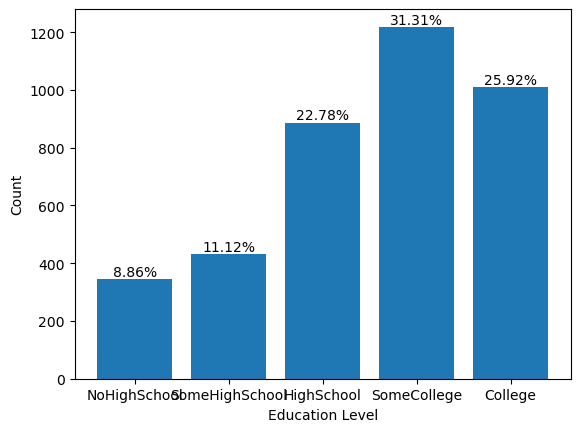

In [31]:
# Education Level
unique_edu, counts = np.unique(education, return_counts=True)

# Custom Order
custom_order = [2, 4, 1, 3, 0]
custom_counts = counts[custom_order]
custom_edu = unique_edu[custom_order]

# Plotting for Education Level
plt.figure()
bars = plt.bar(custom_edu, custom_counts, tick_label=custom_edu)
plt.xlabel('Education Level')
plt.ylabel('Count')
edu_percentages = (custom_counts / np.sum(custom_counts)) * 100
for bar, percentage in zip(bars, edu_percentages):
    plt.text(bar.get_x() + bar.get_width()/2., bar.get_height(),
             f'{percentage:.2f}%', ha='center', va='bottom')
plt.show()

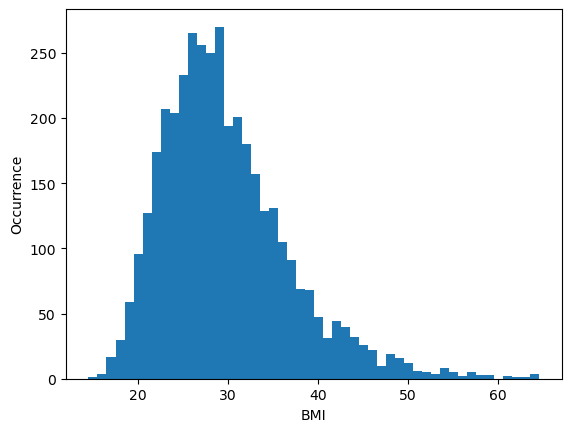

Mean BMI: 29.728608380755304
Median BMI: 28.6
Standard Deviation: 7.099584301973247


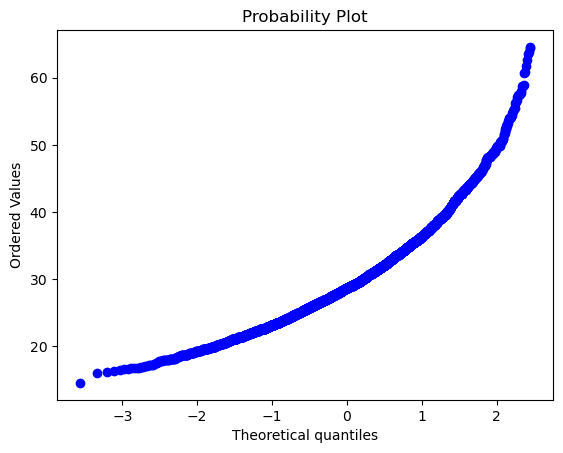

The skewness of the data is: 1.0925857891442994


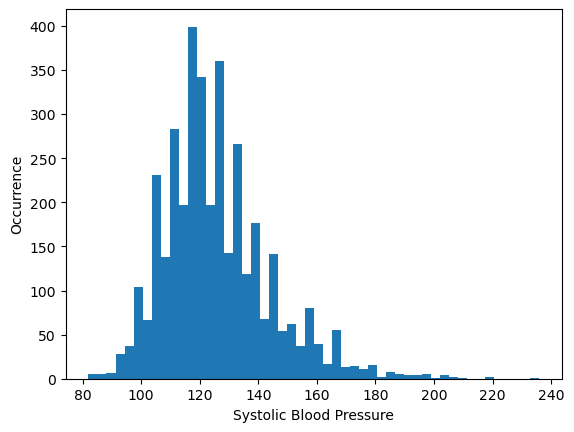

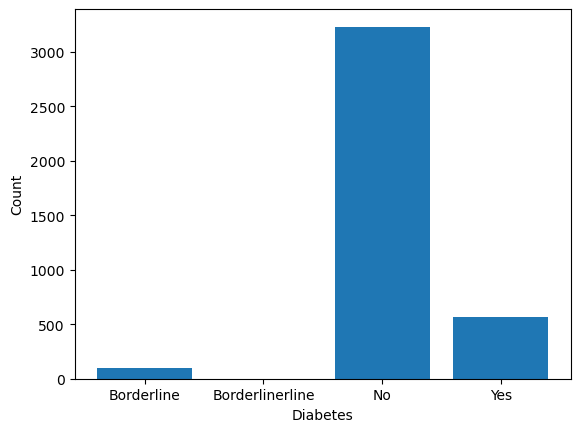

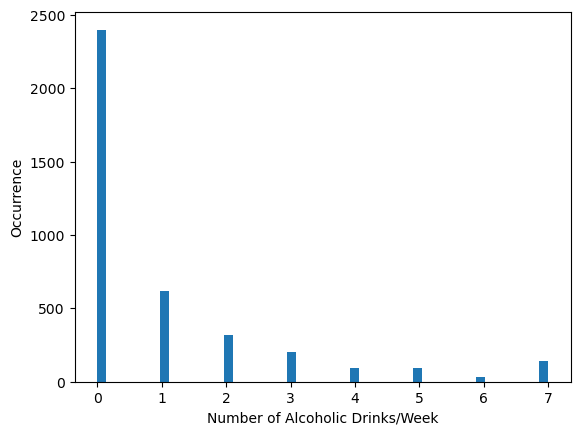

In [29]:
# BMI
plt.figure()
plt.hist(bmi, bins=50)
plt.xlabel('BMI')
plt.ylabel('Occurrence')
plt.show()

bmi_mean = np.nanmean(bmi)
bmi_median = np.nanmedian(bmi)
bmi_sd = np.nanstd(bmi, ddof=1)  # use ddof=1 to get sample std dev
print(f'Mean BMI: {bmi_mean}\nMedian BMI: {bmi_median}\nStandard Deviation: {bmi_sd}')

# QQ plot for BMI
plt.figure()
_ = stats.probplot(bmi, plot=plt)
plt.show()

# Check Skew for BMI
skew_val = skew(bmi, nan_policy='omit')  # To handle NaN values
print(f'The skewness of the data is: {skew_val}')

# Systolic Blood Pressure
plt.figure()
plt.hist(systolic, bins=50)
plt.xlabel('Systolic Blood Pressure')
plt.ylabel('Occurrence')
plt.show()

# Diabetes
diabetes_counts = diabetes.value_counts().sort_index().values
diabetes_labels = diabetes.value_counts().sort_index().index
plt.figure()
plt.bar(diabetes_labels, diabetes_counts)
plt.xlabel('Diabetes')
plt.ylabel('Count')
plt.show()

# Number of Alcoholic Drinks / Week
plt.figure()
plt.hist(alc, bins=50)
plt.xlabel('Number of Alcoholic Drinks/Week')
plt.ylabel('Occurrence')
plt.show()

## Bivariate

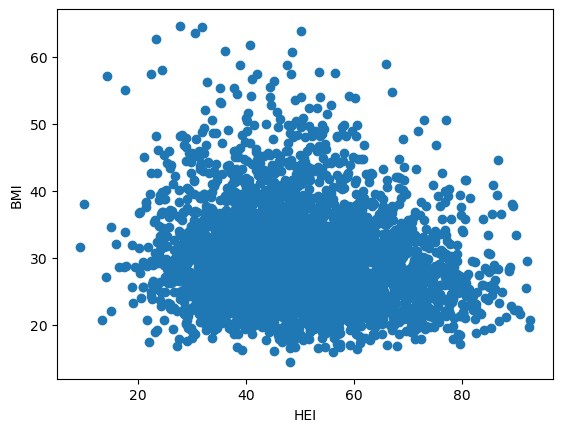

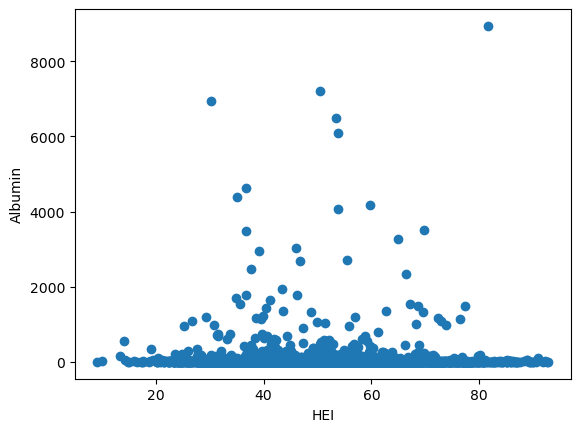

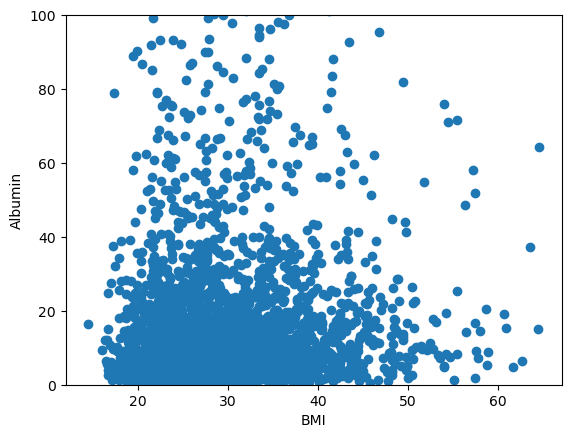

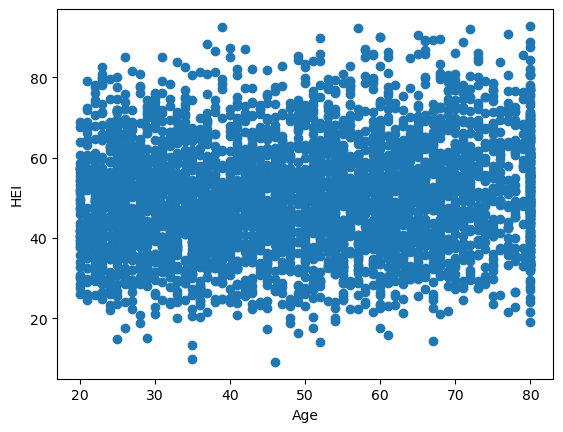

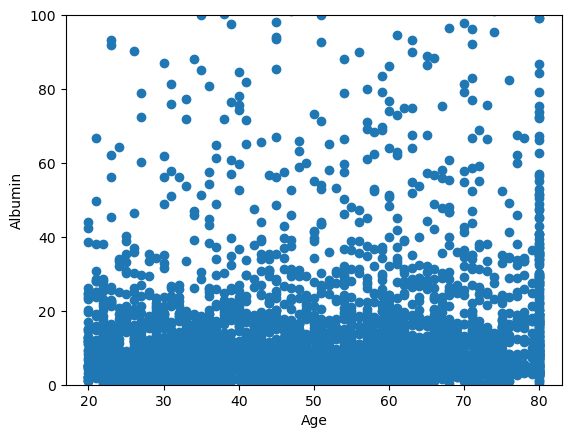

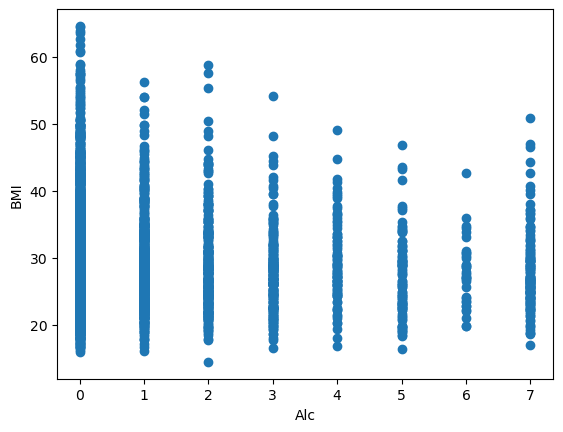

In [32]:
# HEI x BMI
plt.figure()
plt.scatter(HEI, bmi)
plt.xlabel('HEI')
plt.ylabel('BMI')
plt.show()

# HEI x Albumin
plt.figure()
plt.scatter(HEI, albumin)
plt.xlabel('HEI')
plt.ylabel('Albumin')
plt.show()

# BMI x Albumin
plt.figure()
plt.scatter(bmi, albumin)
plt.ylim(0, 100)
plt.xlabel('BMI')
plt.ylabel('Albumin')
plt.show()

# Age x HEI
plt.figure()
plt.scatter(age, HEI)
plt.xlabel('Age')
plt.ylabel('HEI')
plt.show()

# Age x Albumin
plt.figure()
plt.scatter(age, albumin)
plt.ylim(0, 100)
plt.xlabel('Age')
plt.ylabel('Albumin')
plt.show()

# Alc x BMI
plt.figure()
plt.scatter(alc, bmi)
plt.xlabel('Alc')
plt.ylabel('BMI')
plt.show()


## Multivariate (>2)

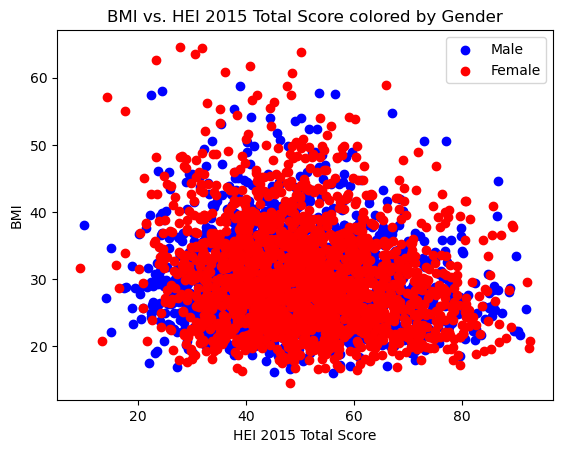

In [33]:
# HEI x BMI x Gender
# Assuming gender is a list with strings 'Male' and 'Female'
male_indices = np.where(np.array(gender) == 'Male')[0]
female_indices = np.where(np.array(gender) == 'Female')[0]

plt.figure()
plt.scatter(HEI[male_indices], bmi[male_indices], color='b', label='Male')
plt.scatter(HEI[female_indices], bmi[female_indices], color='r', label='Female')
plt.xlabel('HEI 2015 Total Score')
plt.ylabel('BMI')
plt.legend()
plt.title('BMI vs. HEI 2015 Total Score colored by Gender')
plt.show()